In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = colors[idx],
                    marker = markers[idx], label = cl,
                    edgecolor = 'black')
        
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]

            plt.scatter(X_test[:, 0], X_test[:, 1],
                        c = '', edgecolor = 'black', alpha = 1.0,
                        linewidth = 1, marker = 'o',
                        s = 100, label = 'test set')

# classification model for binary dataset
- odds ratio : 특정 이벤트가 발생할 확률


- 시그모이드 함수 : $$1/(1 + e ^{-z})$$
- z : 가중치와 특성의 선형 조합
- z가 무한대로 가면 e^(-2)는 매우 작아지기 때문에 1에 가까워진다.

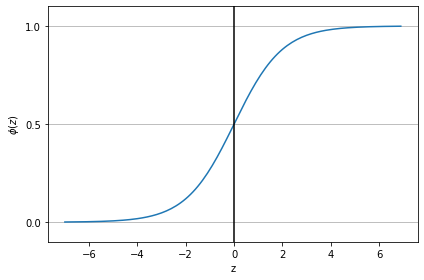

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

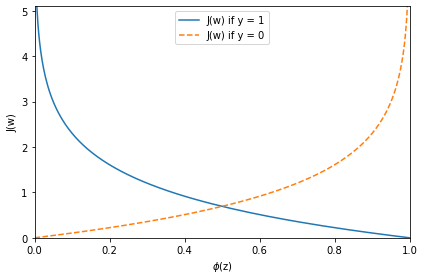

In [7]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label = 'J(w) if y = 1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle = '--', label = 'J(w) if y = 0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# 아달린 구현을 로지스틱 회귀로 변경
- 선형 활성화 함수를 시그모이드 활성화로 바꾸고 임계함수는 0, 1을 반환하도록 변경

In [8]:
class LogisticRegressionGD(object):
    '''
    w_ : 1d-array, 학습된 가중치
    cost_ : 에포크마다 누적된 비용 함수 값
    '''
    def __init__(self, eta = 0.05, n_iter = 100, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                              size = 1 + X.shape[1])

        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
    
            
            cost = (-y.dot(np.log(output)) -
                   ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

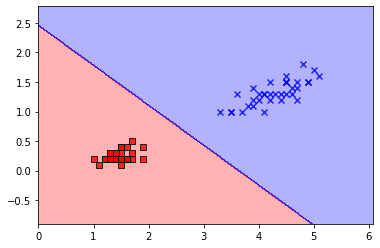

In [10]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X = X_train_01_subset, y = y_train_01_subset, classifier = lrgd)


# 사이킷런 logistic

c:\users\xnoti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


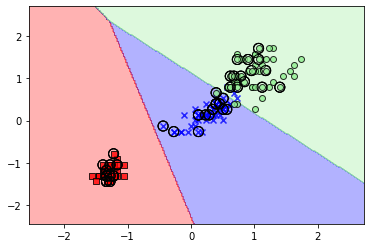

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto',
                        C = 100.0, random_state = 1)

lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                     classifier = lr, test_idx = range(105, 150))
plt.show()

# predict_proba

In [37]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [39]:
X_test_std[0, :].reshape(1, -1)

array([[0.89820289, 1.44587881]])

# 규제를 사용하여 과대적합 피하기
- 과대적합은 머신 러닝에서 자주 발생하는 문제이다.
- 모델이 훈련 데이터는 정확하게 작동하지만 테스트 데이터에서는 정확도가 감소한다.


- 과대적합일 때, 분산이 크다고 한다.
- 과소적합일 때, 편향이 크다고 한다.


- 규제 (regularization)는 공선성 (collinearity; 특성 간의 높은 상관관계)을 다루거나 데이터에서 잡음을 제거하여 과대적합 방지
- 과도한 가중치 값을 제한하기 위해 편향을 주입하는 개념 (ex. L2 축소)



- LogisticRegression의 매개변수 c는 규제 하이퍼파라미터 람다의 역수이다.
- c 의 감소 -> 규제 강도 증가

In [40]:
# LogisticRegression의 매개변수 c는 규제 하이퍼파라미터 람다의 역수이다.
# c 의 감소 -> 규제 강도 증가

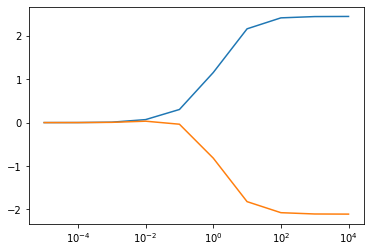

In [42]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 10.**c,
                            random_state = 1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label = 'petal length')
plt.plot(params, weights[:, 1], label = 'petal width')
plt.xscale('log')
plt.show()

# SVM

c:\users\xnoti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


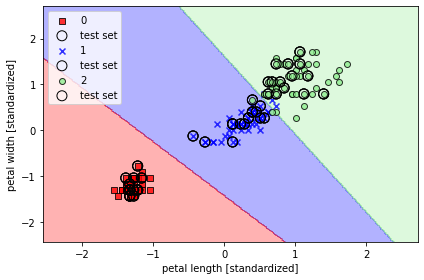

In [23]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

from sklearn.svm import SVC
svm = SVC(kernel='linear', C=10.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Solve non-linear by using kernel SVM

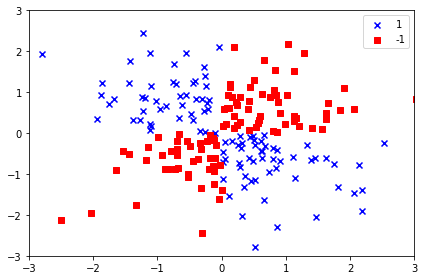

In [15]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0]>0,
                       X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label = '1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r', marker='s',
            label = '-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- 위의 예시처럼 선형적으로 구분되지 않는 데이터에서 kernel method (커널방법)은 매핑 함수 $\phi$를 사용하여 비선형 조합을 선형적으로 구분되는 고차원 공간에 투영한다.
- 투영된 새로운 특성 공간에서 선형 SVM 모델을 훈련
- 문제점 : 새로운 특성을 만드는 비용이 매우 비쌈
- 점곱 $x^{(i)T}x^{(j)}$를 $\phi(x^{(i)})^{T}\phi(x^{(j)})$으로 변환
- 점곱을 계산하는데 드는 높은 비용 절감을 위해 커널함수 $K(x^{(i)},x^{(j)})=\phi(x^{(i)})^{T}\phi(x^{(j)})$으로 정의

- 가장 널리 사용되는 방사 기저 함수 (Radial Basis Function, RBF) aka. Gaussian kernel이 있다.
- 커널은 샘플 간의 유사도 함수(similarity function)으로 해석할 수 있다.
- 음수 부호가 거리 측정을 유사도 점수로 바꾸는 역할을 한다.
- 지수함수로 얻게 되는 유사도 점수는 0~1 범위를 가진다

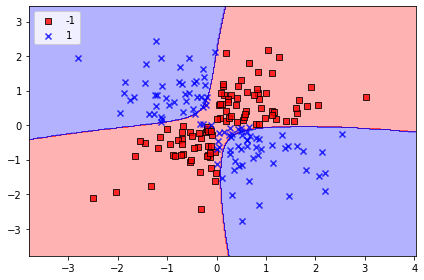

In [16]:
svm = SVC(kernel='rbf', random_state = 1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- gamma = 0.1로 지정한 매개변수 감마 $\gamma$를 가우시안 구의 크기를 제한하는 매개변수로 이해할 수 있다.
- 감마 값이 클수록 support vector의 영향이 줄어들어 결정경계는 구불구불해진다.

c:\users\xnoti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


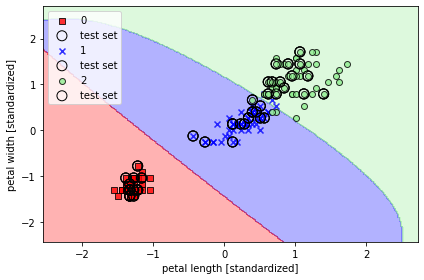

In [17]:
svm = SVC(kernel='rbf', random_state = 1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- 감마 값을 비교적 작게 했기 때문에 결정 경계는 위와 같이 다소 부드럽다.

c:\users\xnoti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


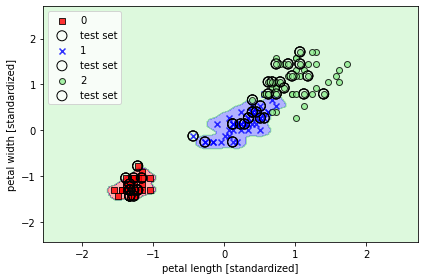

In [24]:
svm = SVC(kernel='rbf', random_state = 1, gamma=100., C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Decision Tree

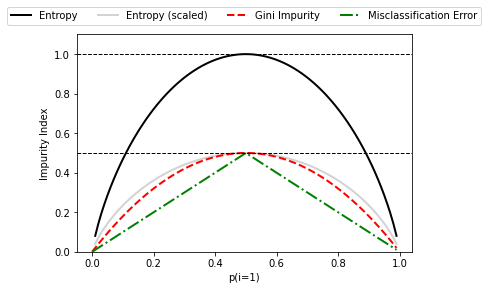

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1-p) + (1-p)*(1-(1-p))

def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1- np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label = lab, linestyle = ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol = 5, fancybox = True, shadow = False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

c:\users\xnoti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


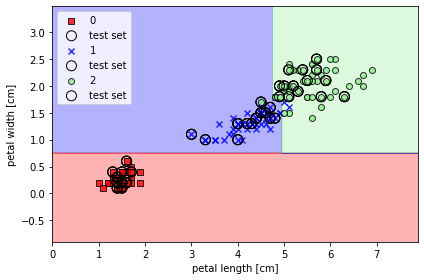

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth = 4, random_state = 1)

tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx = range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Random forest

c:\users\xnoti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


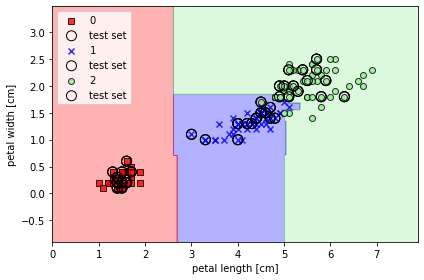

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators = 25, random_state = 1, n_jobs = 2)

forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx = range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# KNN

c:\users\xnoti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


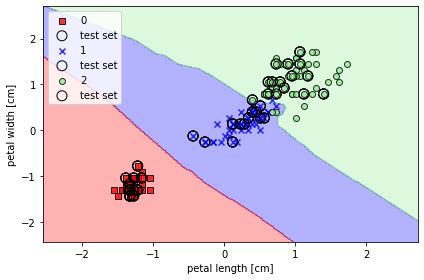

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx = range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()